In [ ]:
# Week 5, lecture 1, slides 31-35.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# URL to read the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe 
dataset = pd.read_csv(url, names=names)
print(dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [69]:
# Input variables
X = dataset.iloc[:, :-1].values
# Output variable
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Feature scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [71]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report (y_test, y_pred))
print (accuracy_score (y_test, y_pred) * 100)

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

96.66666666666667


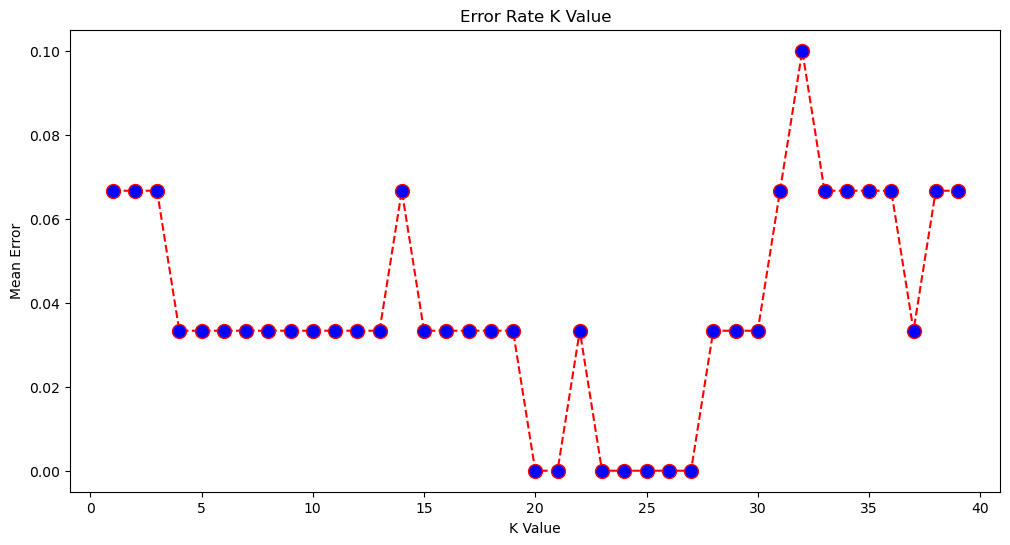

In [73]:
error = []
# Calculating error for K values between 1 and 40 
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test) 
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle= 'dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
# Week 5, lecture 1, pages 43-47 has another example, but is missing the dataframe, so it won't be shown here...

In [ ]:
# review the naive bytes ppt for math, and practice #7 to look at code for naive bytes

In [ ]:
# Same for confusion matrix, PPT for concept, but confusion matrixes are in a ton of practices, so look at those for code